In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tolulopeelijah","key":"210a7e92a996c2d01970b24cf756b16f"}'}

In [3]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

 99% 804M/812M [00:07<00:00, 108MB/s]
100% 812M/812M [00:07<00:00, 111MB/s]


In [6]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [7]:
 ! unzip train.zip
 ! unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os, shutil
import pandas as pd
import numpy as np
from PIL import Image

In [ ]:
import os
path = './train'
labels = []
for i in os.listdir(path)[:5]:
  labels.append(i[:3])
labels = labels[::-1]

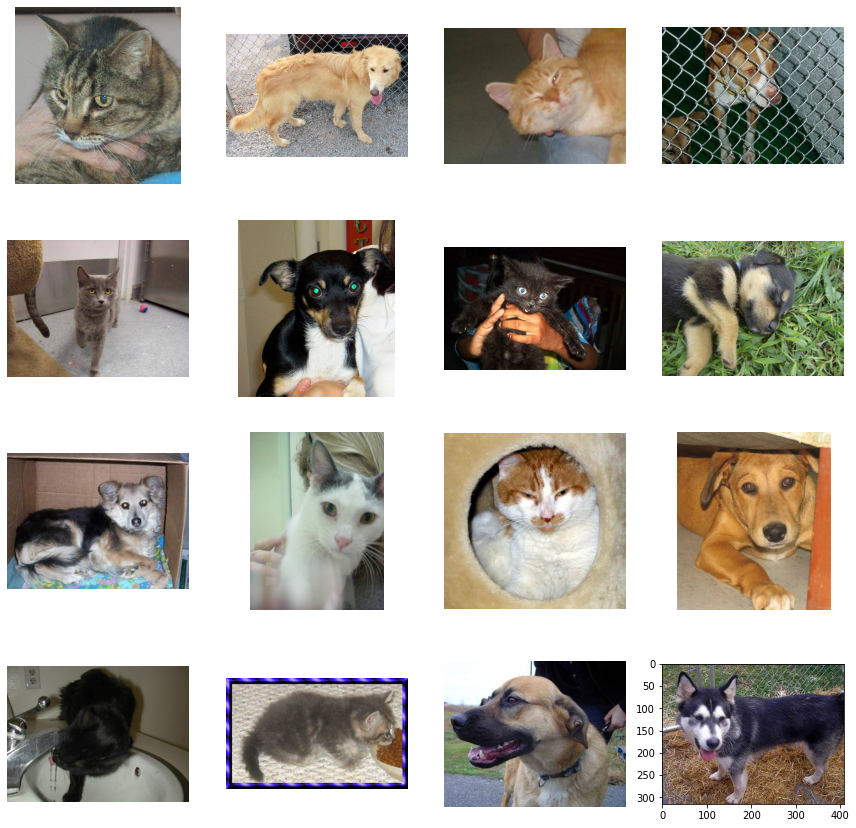

In [16]:
path = './train/'
plt.figure(figsize = (15,15))
for num, image_name in enumerate(os.listdir(path)[:16]):
  image_path = path + image_name
  img = Image.open(image_path)
  im = np.asarray(img)
  plt.axis('off')
  plt.subplot(4,4, num+1)
  plt.imshow(im)

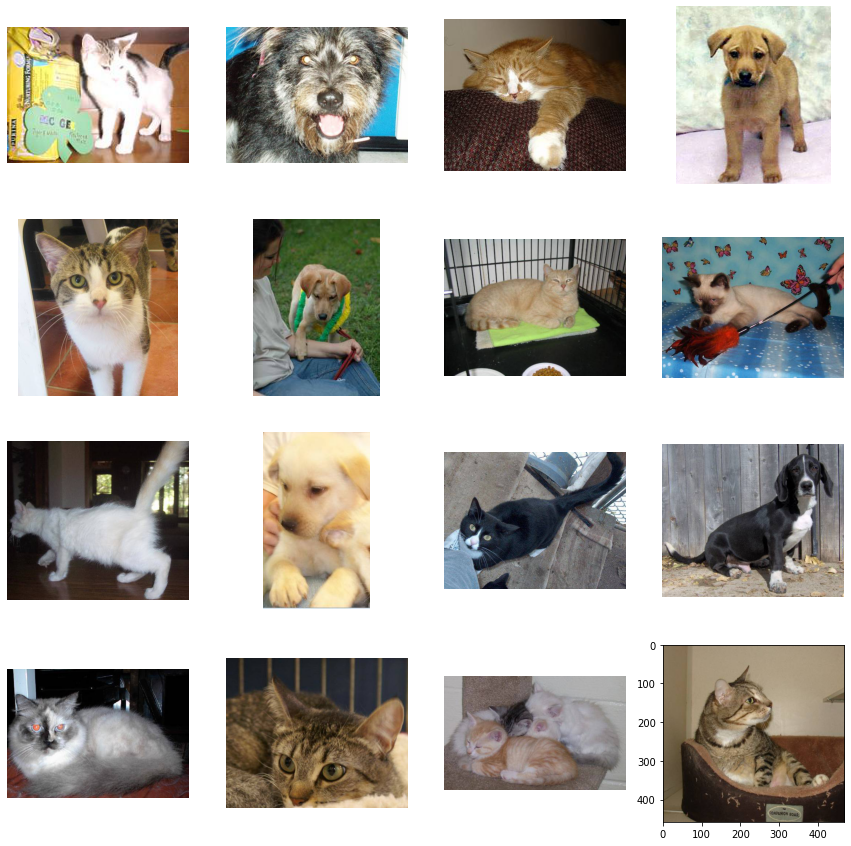

In [18]:
path = './test1/'
plt.figure(figsize = (15,15))
for num, image_name in enumerate(os.listdir(path)[:16]):
  image_path = path + image_name
  img = Image.open(image_path)
  im = np.asarray(img)
  plt.axis('off')
  plt.subplot(4,4, num+1)
  plt.imshow(im)

In [20]:
model = keras.models.Sequential([keras.layers.Conv2D(16, (3,3), input_shape = (300, 300, 3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                 keras.layers.MaxPool2D((2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(500, activation = 'relu'),
                                 keras.layers.Dense(1, activation = 'sigmoid')])

In [21]:
model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.01), loss = keras.losses.BinaryCrossentropy(), metrics = 'accuracy')

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_generator = ImageDataGenerator(rescale = 1/255)
test_data_generaotr = ImageDataGenerator(rescale = 1/255)

train_data = train_data_generator.flow('./')

In [24]:
labels

['cat', 'dog', 'cat', 'dog', 'cat']